In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [6]:
adult_test = pd.read_csv("data/adult_test.csv", header=None)
adult_train = pd.read_csv("data/adult_train.csv", header=None)
print("First few rows of adult.train:")
print(adult_train.head())

First few rows of adult.train:
    0          1             2              3                   4   \
0  age  workclass     education  education-num      marital-status   
1   27    Private  Some-college             10            Divorced   
2   27    Private     Bachelors             13       Never-married   
3   25    Private    Assoc-acdm             12  Married-civ-spouse   
4   46    Private       5th-6th              3  Married-civ-spouse   

                 5              6                   7       8             9   \
0        occupation   relationship                race     sex  capital-gain   
1      Adm-clerical      Unmarried               White  Female             0   
2    Prof-specialty  Not-in-family               White  Female             0   
3             Sales        Husband               White    Male             0   
4  Transport-moving        Husband  Amer-Indian-Eskimo    Male             0   

             10              11              12      13  
0  capita

In [5]:
# Display the first few rows of the datasets to understand their structure
print("First few rows of adult.data:")
print(adult_test.head())

First few rows of adult.data:
    0          1             2              3                   4   \
0  age  workclass     education  education-num      marital-status   
1   25    Private          11th              7       Never-married   
2   38    Private       HS-grad              9  Married-civ-spouse   
3   28  Local-gov    Assoc-acdm             12  Married-civ-spouse   
4   44    Private  Some-college             10  Married-civ-spouse   

                  5             6      7     8             9             10  \
0         occupation  relationship   race   sex  capital-gain  capital-loss   
1  Machine-op-inspct     Own-child  Black  Male             0             0   
2    Farming-fishing       Husband  White  Male             0             0   
3    Protective-serv       Husband  White  Male             0             0   
4  Machine-op-inspct       Husband  Black  Male          7688             0   

               11              12      13  
0  hours-per-week  native-coun

In [8]:
adult_test1 = pd.read_csv('data/adult_test.csv')
adult_test1.columns 

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'target'],
      dtype='object')

In [10]:
adult_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
1,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
2,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,43,Local-gov,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32558,44,Private,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,United-States,<=50K
32559,23,Private,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
32560,45,Local-gov,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States,>50K


In [13]:
# No column names in the dataset, assing them manually
columns = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
           'native-country', 'target']

adult_train.columns = columns
adult_test.columns = columns

# Split adult_test into input and output data
Xtest = adult_test.drop('target', axis=1)
Ytest = adult_test['target']

# Split adult_train into input and output data
Xtrain = adult_train.drop('target', axis=1) 
Ytrain = adult_train['target']

# Display shapes of X and Y to confirm the split
print("\nShape of input features and target for adult.data:")
print(f"X_data shape: {Xtest.shape}")
print(f"y_data shape: {Ytest.shape}")

print("\nShape of input features and target for adult.train:")
print(f"X_train shape: {Xtrain.shape}")
print(f"y_train shape: {Ytrain.shape}")

Xtrain


Shape of input features and target for adult.data:
X_data shape: (16282, 13)
y_data shape: (16282,)

Shape of input features and target for adult.train:
X_train shape: (32562, 13)
y_train shape: (32562,)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
2,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
3,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
4,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,43,Local-gov,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
32558,44,Private,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,United-States
32559,23,Private,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,United-States
32560,45,Local-gov,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States


In [14]:
# Use DictVectorizer to convert strings to numerical values
dict_train = Xtrain.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
Xtrain_enc = dv.fit_transform(dict_train)

Xtrain_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
dict_test = Xtest.to_dict(orient='records')
Xtest_enc = dv.transform(dict_test) 
Xtest_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.pipeline import make_pipeline
n_jobs = -1  # Use all available cores
pipeline = make_pipeline(dv, RandomForestClassifier(n_estimators=100,n_jobs=n_jobs, random_state=42))
pipeline.fit(dict_train, Ytrain)

,steps,"[('dictvectorizer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True
,n_estimators,100
,criterion,'gini'
,max_depth,None


In [18]:
# Make predictions on the test set
Ypred = pipeline.predict(dict_test)

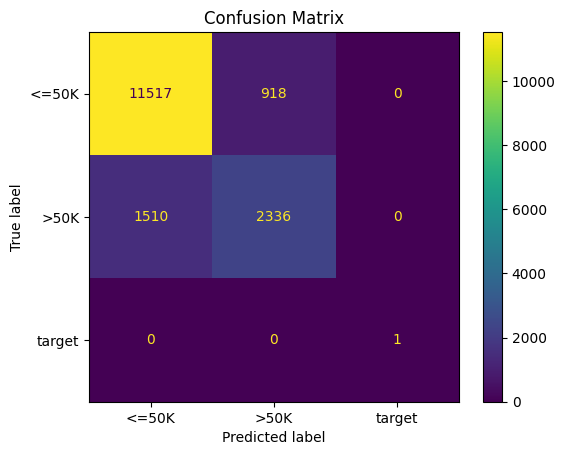

Accuracy of the Random Forest model: 0.85


In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Compute and display the confusion matrix
cm = confusion_matrix(Ytest, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['randomforestclassifier'].classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

# Optionally print accuracy
accuracy = accuracy_score(Ytest, Ypred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

#### Using different n_estimtors to observe over- and underfitting 

In [24]:
# List of n_estimators values to test
n_estimators_range = [1, 3, 5, 10, 30, 50, 100, 200, 500]

n_jobs = -1

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop over n_estimators values
for n in n_estimators_range:
    # Create a pipeline with the current n_estimators
    pipeline = make_pipeline(
        DictVectorizer(sparse=False),
        RandomForestClassifier(n_estimators=n,n_jobs=n_jobs, random_state=42)
    )
    
    # Train the pipeline
    pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
    
    # Evaluate on the training set
    y_train_pred = pipeline.predict(Xtrain.to_dict(orient='records'))
    train_accuracy = accuracy_score(Ytrain, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on the test set
    y_test_pred = pipeline.predict(Xtest.to_dict(orient='records'))
    test_accuracy = accuracy_score(Ytest, y_test_pred)
    test_accuracies.append(test_accuracy)



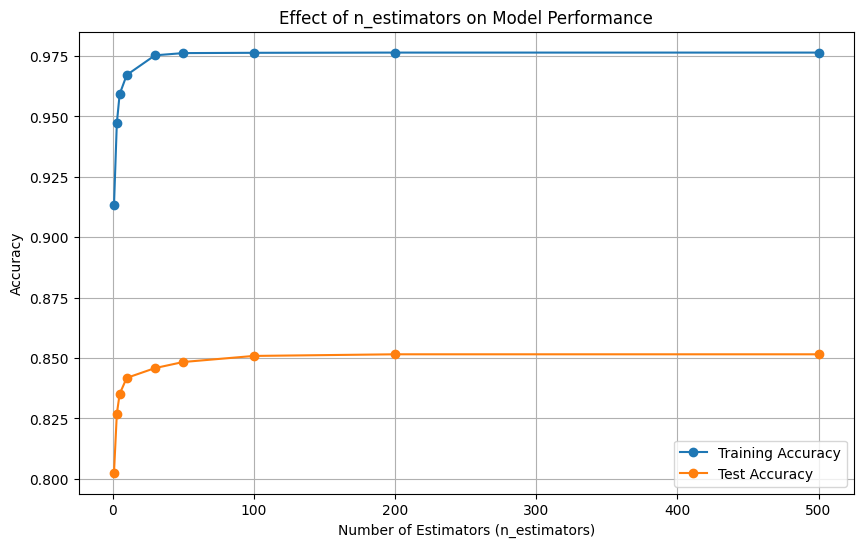

In [25]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of n_estimators on Model Performance')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#### Can see that around 100 Decision Trees is best. More than that gives no imporvement  

#### Analyzing maximal tree depth for over- and underfitting 

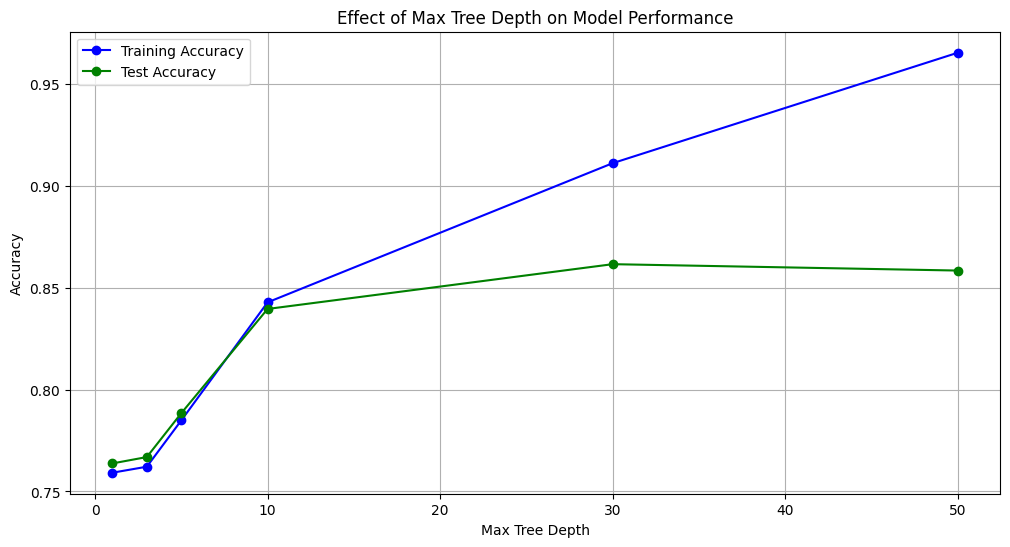

In [27]:
# Define a range for the maximum tree depth
max_depth_range = [1, 3, 5, 10, 30, 50]
n_jobs = -1

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop over the max_depth values
for max_depth in max_depth_range:
    # Create a pipeline with the current max_depth
    pipeline = make_pipeline(
        DictVectorizer(sparse=False),
        RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=42)
    )
    
    # Train the pipeline
    pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
    
    # Evaluate on the training set
    y_train_pred = pipeline.predict(Xtrain.to_dict(orient='records'))
    train_accuracy = accuracy_score(Ytrain, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on the test set
    y_test_pred = pipeline.predict(Xtest.to_dict(orient='records'))
    test_accuracy = accuracy_score(Ytest, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(max_depth_range, test_accuracies, label='Test Accuracy', marker='o', color='green')
plt.title('Effect of Max Tree Depth on Model Performance')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Can see clearly that the model start to over fit when going over 10 as the maximal tree depth in the decision trees - training accuracy becomes great but the test accuracy (which is the important one!) becomes worse 